In [2]:
from tensorflow import keras 
#from keras.datasets import cifer10
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Dense,Activation,Flatten,Dropout ,BatchNormalization,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils 
from keras.models import Sequential 

import numpy as np
from keras import regularizers, optimizers 



In [3]:
hello=keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=hello.load_data()

170498071/170498071 [==============================] - 3s 0us/step


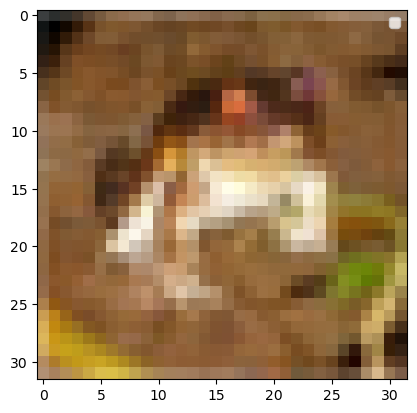

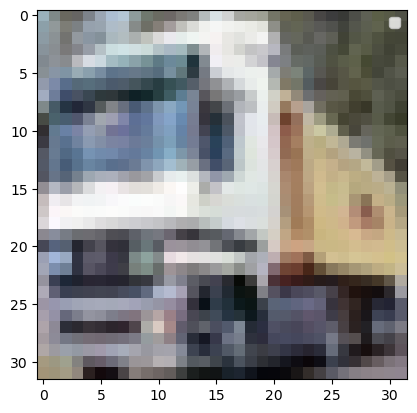

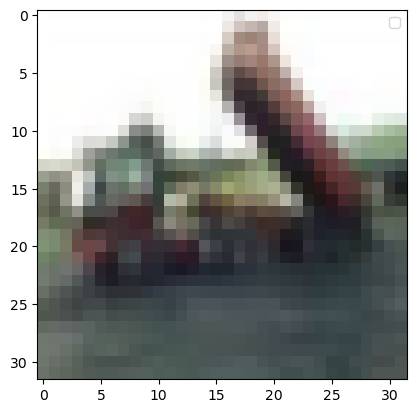

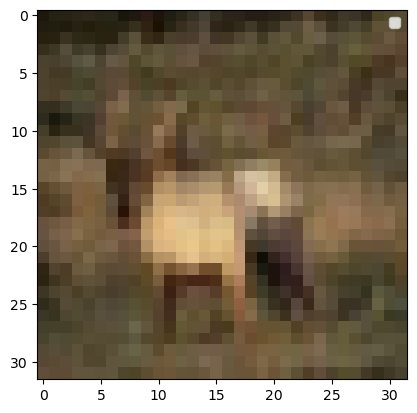

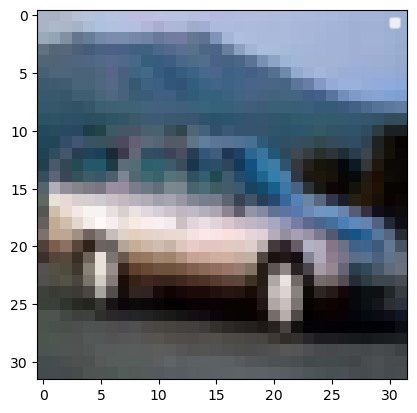

In [4]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(x_train[i])
    plt.legend(y_train[0])
    plt.show()

        

In [5]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [6]:
from keras.utils import to_categorical 
y_train=to_categorical(y_train,num_classes =10 )
y_test=to_categorical(y_test,num_classes=10)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
from sklearn.model_selection import train_test_split
X,XTEST,Y,YTEST=train_test_split(x_train,y_train,train_size=.2,random_state=666)

In [10]:
X[0]

array([[[0.6862745 , 0.93333334, 0.9843137 ],
        [0.654902  , 0.9019608 , 0.94509804],
        [0.6627451 , 0.9019608 , 0.9490196 ],
        ...,
        [0.43529412, 0.6431373 , 0.7529412 ],
        [0.42745098, 0.63529414, 0.7490196 ],
        [0.4392157 , 0.6431373 , 0.7647059 ]],

       [[0.5019608 , 0.7058824 , 0.81960785],
        [0.48235294, 0.67058825, 0.79607844],
        [0.45490196, 0.63529414, 0.7764706 ],
        ...,
        [0.28627452, 0.41960785, 0.5372549 ],
        [0.29411766, 0.42352942, 0.54509807],
        [0.3019608 , 0.42745098, 0.56078434]],

       [[0.3764706 , 0.49411765, 0.5921569 ],
        [0.34901962, 0.46666667, 0.57254905],
        [0.2901961 , 0.42745098, 0.54901963],
        ...,
        [0.22352941, 0.33333334, 0.41960785],
        [0.26666668, 0.3529412 , 0.44705883],
        [0.25490198, 0.34509805, 0.45490196]],

       ...,

       [[0.60784316, 0.56078434, 0.47843137],
        [0.6784314 , 0.64705884, 0.5411765 ],
        [0.7254902 , 0

In [ ]:
# ill fust do this without any image data generator, then one with image data gen ,write the code here

In [50]:
base_hidden_units=32
weight_decay=1e-4


model=Sequential([
    #cnn 1
    Conv2D(base_hidden_units ,   kernel_size=3,padding='same' ,kernel_regularizer=regularizers.l2(weight_decay)),
    Activation('relu'),
    BatchNormalization(),
    
    #2nd cnn
    Conv2D(base_hidden_units ,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay) ),
    Activation('relu'),
    BatchNormalization(),
    
    #pool 
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    #cnn 3
    Conv2D(base_hidden_units*2,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)),
    Activation('relu'),
    BatchNormalization(),

    
    #cnn4
    
    Conv2D( base_hidden_units*2,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay) ),
    Activation('relu'),
    BatchNormalization(),
    
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    
    #conv5
    Conv2D( base_hidden_units*4,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay)),
    Activation('relu'),
    BatchNormalization(),

              
    #conv6
    Conv2D( base_hidden_units*4,kernel_size=3,padding='same',kernel_regularizer=regularizers.l2(weight_decay) ),
    Activation('relu'),
    BatchNormalization(),  
        
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),
           
    Flatten(),
    
    
    
    Dense(10,activation='softmax')
    

              ] )
print('done')



done


In [38]:
from keras.optimizers import Adam 
#from optimizers import Adam

In [70]:
optimizer =Adam(learning_rate=.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy ',optimizer=optimizer,metrics=['accuracy'])

In [76]:
model.build(None)  # Replace input_shape with the actual input shape


TypeError: Sequential.build() takes from 1 to 2 positional arguments but 3 were given

In [74]:
X[0].shape

(32, 32, 3)

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          multiple                  896       
                                                                 
 activation_39 (Activation)  multiple                  0         
                                                                 
 batch_normalization_38 (Bat  multiple                 128       
 chNormalization)                                                
                                                                 
 conv2d_40 (Conv2D)          multiple                  9248      
                                                                 
 activation_40 (Activation)  multiple                  0         
                                                                 
 batch_normalization_39 (Bat  multiple                 128       
 chNormalization)                                     

In [61]:
batch_size=128
epochs=10


In [68]:
checkpoint=ModelCheckpoint(filepath='hello.hdf5',verbose=1,save_best_only=True)

In [73]:
hist=model.fit(X,Y,callbacks=[checkpoint],steps_per_epoch=x_train.shape[0]//batch_size,epochs=epochs,verbose=1,validation_data=(XTEST,YTEST))

Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 2653, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 2600, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/opt/conda/lib/python3.10/site-packages/keras/saving/legacy/serialization.py", line 543, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'categorical_crossentropy '. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


TRAINNING KORA BAKI ASE , HOYTO KALKE DIBO, 